In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from data.dataset_normalized import NormalizedModelNet40
import os
import numpy as np

from utils import *
from model3 import Encoder
from torch.utils.data import DataLoader, Subset
import torch
from evaluate import *
from train import train

In [8]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    print(torch.cuda.get_device_name(0))
device

NVIDIA GeForce GTX 1060 6GB


'cuda'

### Getting the dataset path

In [9]:
dataset_name = "modelnet40_ply_hdf5_2048"

os.chdir('..')
modelnet40_path = os.path.join(os.getcwd(), dataset_name)
os.chdir('TransformersFor3dPointCLouds')
print(modelnet40_path)

G:\Edu\University\Forth Year\Second Semester\COMP 390\modelnet40_ply_hdf5_2048


### Dataset path when training locally

In [10]:
dataset_path = os.path.join(os.getcwd(), os.path.join("data", "dataset_path.txt"))
with open(dataset_path, 'r') as file:
    modelnet40_path = file.readline()
modelnet40_path = modelnet40_path.split('\n')[0]
modelnet40_path

'C:\\Users\\abooo\\Desktop\\new_dataset\\modelnet40_ply_hdf5_2048'

# Overfitting experiment

### Initalizing the training set DataLoader object

In [11]:
SAMPLE_SIZE = 256
partition = 'train'
SAMPLING_METHOD = 'fps'
batch_size = 10

In [12]:
dataset = NormalizedModelNet40(dataset_path=modelnet40_path, partition=partition,
                               sample_size=SAMPLE_SIZE, sampling_method=SAMPLING_METHOD)

In [13]:
class_ind_dist = dataset.class_indicies_distribution()

In [14]:
overfit_classes_num = 1
OVERFITTING_SAMPLE_SIZE = 10
overfitting_set = []
for i in range(overfit_classes_num):
    overfitting_set += class_ind_dist[i][:OVERFITTING_SAMPLE_SIZE]

In [15]:
overfitting_subset = Subset(dataset, overfitting_set)
overfitting_loader = DataLoader(overfitting_subset, batch_size=batch_size, shuffle=True)

## Overfitting the model

In [16]:
from torch.nn import CrossEntropyLoss
from torch.nn import NLLLoss

criterion = CrossEntropyLoss().to(device)

# Trying the new model:

In [17]:
input_dims = 3
embed_dim = 256
out_dims = 8
num_layers = 6
num_heads = 1
num_classes = 40
dropout = 0.0

In [18]:
model = Encoder(input_size=SAMPLE_SIZE, input_dims=input_dims, embed_dim=embed_dim, 
                out_dims=out_dims, num_layers=num_layers, num_heads=num_heads,
                num_classes=num_classes, dropout=dropout).to(device)

In [19]:
torch.autograd.set_detect_anomaly(True)

In [20]:
from torch.optim import SGD, Adam
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR

parameters = model.parameters()
learning_rate = 1e-4
weight_decay = 1e-1
momentum = 0.9

# optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)
optimizer = Adam(parameters, lr=learning_rate, amsgrad=True)
epochs = 10
scheduler = StepLR(optimizer=optimizer, step_size=epochs // 4, gamma=0.8)

In [21]:
# scheduler = None
loss,_,_,_ = train(model=model, optimizer=optimizer,
          scheduler=scheduler, train_loader=overfitting_loader, 
             validation_loader=overfitting_loader,
          criterion=criterion, epochs=epochs, verbose=False)

Current device: cuda


100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

Evaluating epoch...



C:\Users\abooo\anaconda3\envs\comp411\lib\site-packages\torch\optim\lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


Epoch: 0 | Loss: 3.27 | Train accuracy: 0.0 | Validation Accuracy: 100.0| Runtime: 2.51 seconds


100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.03it/s]


Epoch: 1 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


Epoch: 2 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 3 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 4 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 5 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Epoch: 6 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


Epoch: 7 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  2.06it/s]


Epoch: 8 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.09 seconds


100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

Evaluating epoch...



100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

Epoch: 9 | Loss: 0.00 | Train accuracy: 100.0 | Validation Accuracy: 100.0| Runtime: 1.12 seconds


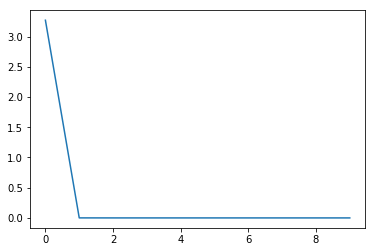

In [22]:
import matplotlib.pyplot as plt
plt.plot(loss)

In [23]:
accuracy = eval_2(model, overfitting_loader)

100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


In [24]:
print(f'{accuracy}%') 

100.0%


# End of trying the new model

# Start training the actual model

### Defining the dataset and splitting it:

In [7]:
SAMPLE_SIZE = 256
SAMPLING_METHOD = 'fps'
batch_size = 32

In [8]:
train_dataset = NormalizedModelNet40(dataset_path=modelnet40_path, partition='train',
                               sample_size=SAMPLE_SIZE, sampling_method=SAMPLING_METHOD)

test_dataset = NormalizedModelNet40(dataset_path=modelnet40_path, partition='test',
                               sample_size=SAMPLE_SIZE, sampling_method=SAMPLING_METHOD)

In [9]:
train_portion = 0.9

N = len(train_dataset)

n_train = int(N * 0.9)
n_validation = N - n_train

In [10]:
train_set, validation_set = torch.utils.data.random_split(train_dataset, [n_train , n_validation])

train_loader = DataLoader(dataset=train_set, batch_size=batch_size)
validation_loader = DataLoader(dataset=validation_set, batch_size=batch_size)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size)

### Creating the model:

In [11]:
input_dims = 3
embed_dim = 256
out_dims = 8
num_layers = 6
num_heads = 1
num_classes = 40
dropout = 0.5

In [12]:
model = Encoder(input_size=SAMPLE_SIZE, input_dims=input_dims, embed_dim=embed_dim, 
                out_dims=out_dims, num_layers=num_layers, num_heads=num_heads,
                num_classes=num_classes, dropout=dropout).to(device)

### Optimizer:

In [13]:
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

parameters = model.parameters()
learning_rate = 8e-5
momentum = 0.9
weight_decay = 1e-5

optimizer = SGD(parameters, lr=learning_rate, momentum=momentum)
scheduler = ReduceLROnPlateau(optimizer, factor=0.5, patience=5, verbose=True)

### Loss function:

In [14]:
from torch.nn import CrossEntropyLoss

class_weights = torch.tensor(train_dataset.calculate_class_weights()).float().to(device=device)
criterion = CrossEntropyLoss(weight=class_weights).to(device=device)

In [15]:
epochs = 60
loss, runtime, train_acc, validation_acc = train(model=model, optimizer=optimizer,
                                    scheduler=scheduler, train_loader=train_loader,
                                    validation_loader=validation_loader, criterion=criterion,
                                    epochs=epochs, verbose=False)

Current device: cuda


100%|██████████| 554/554 [04:41<00:00,  1.97it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch: 0 | Loss: 1935.18 | Train accuracy: 21.705776173285198 | Validation Accuracy: 30.141129032258064| Runtime: 308.99 seconds


100%|██████████| 554/554 [04:36<00:00,  2.00it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch: 1 | Loss: 2679.92 | Train accuracy: 27.62861010830325 | Validation Accuracy: 27.116935483870968| Runtime: 303.74 seconds


100%|██████████| 554/554 [04:36<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 2 | Loss: 2119.00 | Train accuracy: 35.694945848375454 | Validation Accuracy: 34.07258064516129| Runtime: 303.46 seconds


100%|██████████| 554/554 [04:36<00:00,  2.00it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch: 3 | Loss: 1832.10 | Train accuracy: 40.01579422382672 | Validation Accuracy: 43.145161290322584| Runtime: 303.58 seconds


100%|██████████| 554/554 [04:36<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch: 4 | Loss: 1812.62 | Train accuracy: 42.45261732851986 | Validation Accuracy: 42.03629032258065| Runtime: 303.22 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 5 | Loss: 1582.75 | Train accuracy: 46.75090252707581 | Validation Accuracy: 47.278225806451616| Runtime: 302.95 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 6 | Loss: 1501.51 | Train accuracy: 48.691335740072205 | Validation Accuracy: 53.528225806451616| Runtime: 302.66 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 7 | Loss: 1339.32 | Train accuracy: 51.17328519855596 | Validation Accuracy: 47.58064516129032| Runtime: 302.56 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 8 | Loss: 916.94 | Train accuracy: 57.46841155234657 | Validation Accuracy: 56.149193548387096| Runtime: 302.72 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch: 9 | Loss: 688.39 | Train accuracy: 63.94404332129964 | Validation Accuracy: 60.483870967741936| Runtime: 302.53 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 10 | Loss: 602.46 | Train accuracy: 67.17057761732852 | Validation Accuracy: 63.810483870967744| Runtime: 302.61 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 11 | Loss: 565.55 | Train accuracy: 68.44539711191335 | Validation Accuracy: 65.12096774193549| Runtime: 303.03 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.28it/s]


Epoch: 12 | Loss: 536.76 | Train accuracy: 69.78790613718411 | Validation Accuracy: 65.12096774193549| Runtime: 302.61 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 13 | Loss: 514.47 | Train accuracy: 71.06272563176896 | Validation Accuracy: 64.01209677419355| Runtime: 302.65 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 14 | Loss: 495.45 | Train accuracy: 72.05550541516246 | Validation Accuracy: 64.81854838709677| Runtime: 302.76 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 15 | Loss: 486.00 | Train accuracy: 72.01037906137184 | Validation Accuracy: 64.41532258064517| Runtime: 302.65 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 16 | Loss: 483.47 | Train accuracy: 72.48420577617328 | Validation Accuracy: 63.306451612903224| Runtime: 302.59 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 17 | Loss: 474.01 | Train accuracy: 72.45036101083032 | Validation Accuracy: 63.608870967741936| Runtime: 302.63 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 18 | Loss: 460.24 | Train accuracy: 73.45442238267148 | Validation Accuracy: 64.71774193548387| Runtime: 302.57 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 19 | Loss: 453.52 | Train accuracy: 73.61236462093864 | Validation Accuracy: 64.51612903225806| Runtime: 302.61 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 20 | Loss: 454.76 | Train accuracy: 73.63492779783394 | Validation Accuracy: 62.70161290322581| Runtime: 302.70 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 21 | Loss: 454.59 | Train accuracy: 73.8379963898917 | Validation Accuracy: 67.64112903225806| Runtime: 302.66 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 22 | Loss: 445.69 | Train accuracy: 74.3456678700361 | Validation Accuracy: 63.306451612903224| Runtime: 302.99 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 23 | Loss: 430.84 | Train accuracy: 74.78564981949458 | Validation Accuracy: 65.22177419354838| Runtime: 302.63 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 24 | Loss: 424.48 | Train accuracy: 74.9774368231047 | Validation Accuracy: 65.22177419354838| Runtime: 302.50 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 25 | Loss: 413.17 | Train accuracy: 75.50767148014441 | Validation Accuracy: 66.43145161290323| Runtime: 302.66 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 26 | Loss: 398.52 | Train accuracy: 76.1168772563177 | Validation Accuracy: 68.14516129032258| Runtime: 302.76 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 27 | Loss: 378.68 | Train accuracy: 77.24503610108303 | Validation Accuracy: 66.93548387096774| Runtime: 302.63 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]


Epoch: 28 | Loss: 372.08 | Train accuracy: 77.96705776173285 | Validation Accuracy: 64.51612903225806| Runtime: 302.70 seconds


100%|██████████| 554/554 [04:35<00:00,  2.01it/s]

Evaluating epoch...



100%|██████████| 62/62 [00:27<00:00,  2.27it/s]

Epoch: 29 | Loss: 381.26 | Train accuracy: 76.985559566787 | Validation Accuracy: 67.94354838709677| Runtime: 302.68 seconds


In [16]:
loss, runtime, train_acc, validation_acc = loss

ValueError: too many values to unpack (expected 4)

### Average epoch time:

In [17]:
runtime = np.array(runtime)
print(f'Average epoch runtime: {np.mean(runtime / 60):.2f} mins')

Average epoch runtime: 5.05 mins


### Plotting the loss:

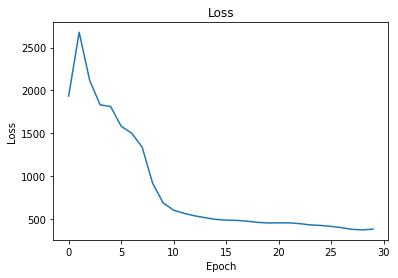

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.title("Loss") 
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss)

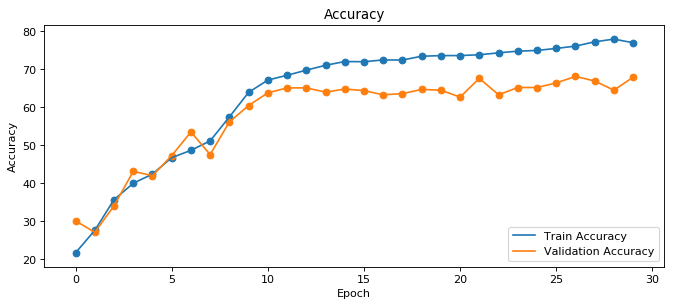

In [19]:
figure(figsize=(10, 4), dpi=80)

plt.title("Accuracy") 
plt.plot(train_acc)
plt.plot(validation_acc)

plt.scatter(list(range(epochs)), train_acc)
plt.scatter(list(range(epochs)), validation_acc)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.show()

In [20]:
accuracy = eval_2(model, test_loader)

100%|██████████| 155/155 [01:15<00:00,  2.04it/s]


In [21]:
print(f'{accuracy:.2f}%')

66.94%


In [25]:
test_dataset[0][0].shape

(256, 3)

In [27]:
x = test_dataset[0][0].view(SAMPLE_SIZE, 3).to(device)
yhat = model(x.float())
yhat

ValueError: Type must be a sub-type of ndarray type

softmax = torch.nn.Softmax()(yhat)
softmax

In [23]:
torch.argmax(softmax)

NameError: name 'softmax' is not defined

### Saving the model:

In [28]:
import utils
model_path = os.path.join(os.getcwd(), "model")
utils.save_model(model, model_path)

### Load the model:

In [ ]:
# model_state_dict = utils.load_model_state_dict(model_path)
# model = model.load_state_dict(model_state_dict)

## Class accuracy:

In [40]:
nb_classes = 40

confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes, _) in tqdm(enumerate(test_loader)):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs.float())
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1


155it [01:07,  2.30it/s]


In [43]:
class_accuracies = confusion_matrix.diag()/confusion_matrix.sum(1)
class_acc_dict = dict(zip(train_dataset.CLASSES, class_accuracies.tolist()))
class_acc_dict

{'airplane': 0.9700000286102295,
 'bathtub': 0.7200000286102295,
 'bed': 0.699999988079071,
 'bench': 0.6499999761581421,
 'bookshelf': 0.8999999761581421,
 'bottle': 0.6299999952316284,
 'bowl': 0.75,
 'car': 0.7799999713897705,
 'chair': 0.8700000047683716,
 'cone': 0.699999988079071,
 'cup': 0.20000000298023224,
 'curtain': 0.15000000596046448,
 'desk': 0.5930232405662537,
 'door': 0.10000000149011612,
 'dresser': 0.5581395626068115,
 'flower_pot': 0.0,
 'glass_box': 0.5600000023841858,
 'guitar': 0.8999999761581421,
 'keyboard': 0.8999999761581421,
 'lamp': 0.4000000059604645,
 'laptop': 1.0,
 'mantel': 0.7099999785423279,
 'monitor': 0.8999999761581421,
 'night_stand': 0.25581395626068115,
 'person': 0.800000011920929,
 'piano': 0.41999998688697815,
 'plant': 0.4099999964237213,
 'radio': 0.0,
 'range_hood': 0.6499999761581421,
 'sink': 0.4000000059604645,
 'sofa': 0.9200000166893005,
 'stairs': 0.6499999761581421,
 'stool': 0.10000000149011612,
 'table': 0.800000011920929,
 'tent

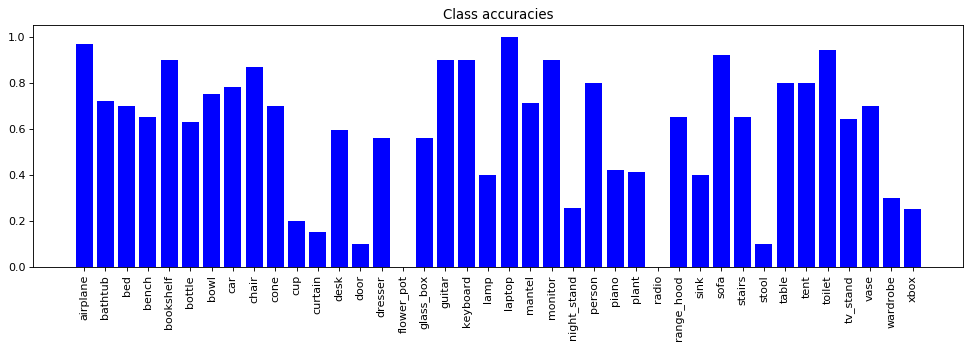

In [44]:
figure(figsize=(15, 4), dpi=80)
plt.title('Class accuracies')
y = class_accuracies.tolist()
x = test_dataset.CLASSES
plt.bar(x, y, color='b')
plt.xticks(x, x, rotation=90)
plt.show()

In [45]:
all_labels = np.concatenate((train_dataset.labels, test_dataset.labels))

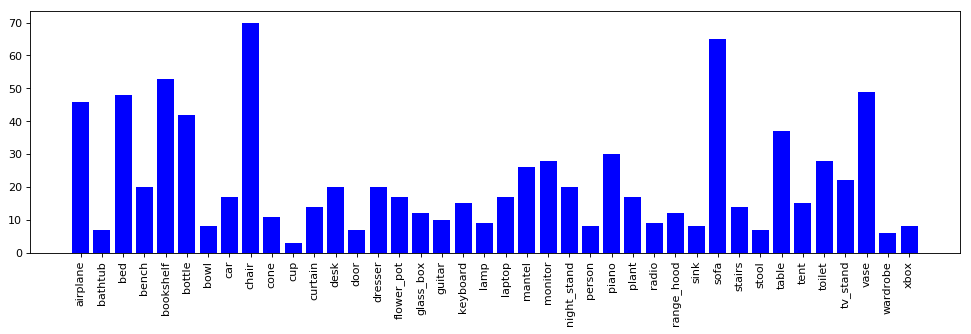

In [46]:
figure(figsize=(15, 4), dpi=80)
y = np.bincount(labels)
x = train_dataset.CLASSES

plt.bar(x, y, color='b')
plt.xticks(x, x, rotation=90)
plt.show()